In [130]:
import sys
sys.path.append('/root/server')

In [131]:
from read_database import SlurmDataBase
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
database = SlurmDataBase(
    host = "localhost",
    user = "slurm",
    password = "slurm",
    database = "slurmdb_micro3",
    cluster_prefix = "micro"
)

In [133]:
table = database.read_table("select job_name, id_job, time_submit, time_start, time_end, id_user from micro_job_table")

In [134]:
logged_params = pd.read_csv('logfile.csv')

In [135]:
logged_params = logged_params[~logged_params['job_name'].str.endswith('_test_only')] 

In [136]:
full_dataset = pd.merge(logged_params, table, on='job_name', how='inner')

In [137]:
full_dataset['duration'] = full_dataset['time_end'] - full_dataset['time_start']
full_dataset["waittime"] = full_dataset["time_start"] - full_dataset["time_submit"]
print(len(full_dataset[(full_dataset['duration'] < 0) | (full_dataset['waittime'] < 0)]))
full_dataset = full_dataset[(full_dataset['duration'] >= 0) & (full_dataset['waittime'] >= 0)]

0


In [149]:
full_dataset = full_dataset[:200]

In [150]:
X = full_dataset.drop(columns=['duration', 'time_end', 'time_start', 'waittime', 'time_submit', 'job_name', 'user_id', 'id_user', 'id_job'])
y = full_dataset[['waittime']]

In [151]:
X.to_csv('X.csv')
y.to_csv('y.csv')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


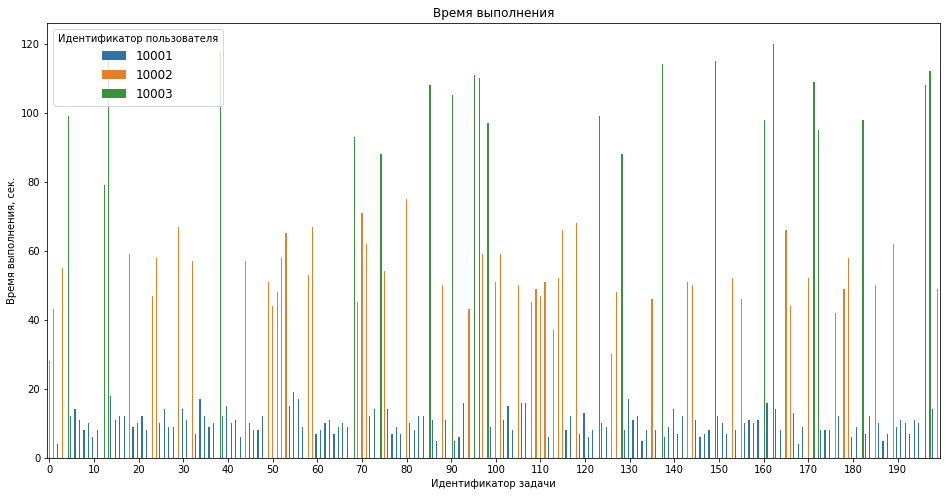

In [153]:
plot_dataset = full_dataset[['time_submit', 'duration', 'id_job', 'id_user']]
plot_dataset['time_submit'] = plot_dataset['time_submit'] - plot_dataset['time_submit'].min()

plt.figure(figsize=(16, 8))
sns.barplot(x='id_job', y='duration', hue='id_user', data=plot_dataset, ci=None)

ax = plt.gca()
ax.set_xticks(range(0, 200, 10))
ax.set_xticklabels(range(0, 200, 10))
plt.legend(fontsize=12, title="Идентификатор пользователя")
plt.title('Время выполнения')
plt.ylabel('Время выполнения, сек.')
plt.xlabel('Идентификатор задачи')

# Отображение графика
plt.show()


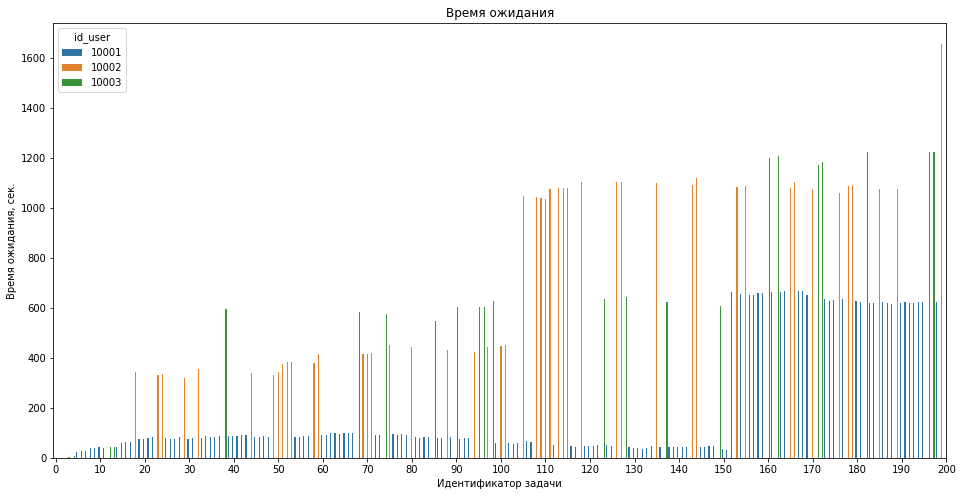

In [154]:
plot_dataset = full_dataset[['time_submit', 'waittime', 'id_job', 'id_user']]
plt.figure(figsize=(16, 8))
sns.barplot(x='id_job', y='waittime', hue='id_user', data=plot_dataset, ci=None)

ax = plt.gca()
ax.set_xticks(range(0, 201, 10))
ax.set_xticklabels(range(0, 201, 10))

plt.title('Время ожидания')
plt.ylabel('Время ожидания, сек.')
plt.xlabel('Идентификатор задачи')

# Отображение графика
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


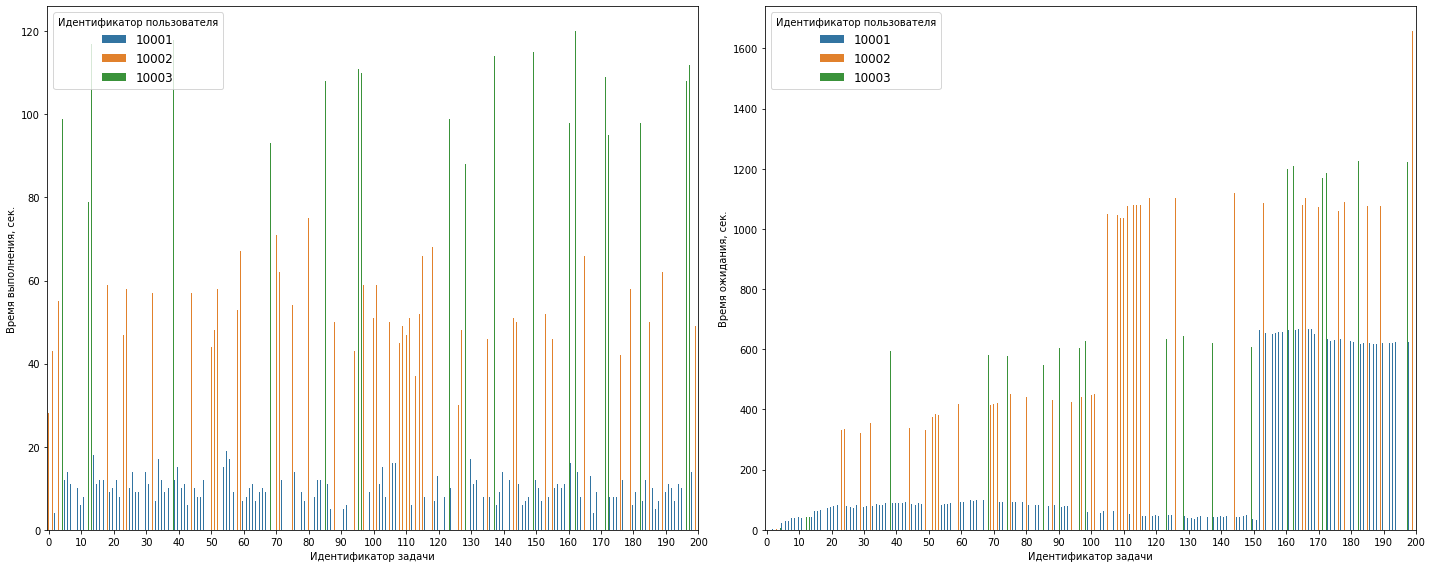

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Первый график
plot_dataset1 = full_dataset[['time_submit', 'duration', 'id_job', 'id_user']]
plot_dataset1['time_submit'] = plot_dataset1['time_submit'] - plot_dataset1['time_submit'].min()

# Второй график
plot_dataset2 = full_dataset[['time_submit', 'waittime', 'id_job', 'id_user']]
plot_dataset2['time_submit'] = plot_dataset2['time_submit'] - plot_dataset2['time_submit'].min()

# Создание subplot
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Первый график
sns.barplot(ax=axs[0], x='id_job', y='duration', hue='id_user', data=plot_dataset1, ci=None)
axs[0].set_xticks(range(0, 201, 10))
axs[0].set_xticklabels(range(0, 201, 10))
axs[0].legend(fontsize=12, title="Идентификатор пользователя")
# axs[0].set_title('Время выполнения')
axs[0].set_ylabel('Время выполнения, сек.')
axs[0].set_xlabel('Идентификатор задачи')

# Второй график
sns.barplot(ax=axs[1], x='id_job', y='waittime', hue='id_user', data=plot_dataset2, ci=None)
axs[1].set_xticks(range(0, 201, 10))
axs[1].set_xticklabels(range(0, 201, 10))
# axs[1].set_title('Время ожидания')
axs[1].set_ylabel('Время ожидания, сек.')
axs[1].set_xlabel('Идентификатор задачи')
axs[1].legend(fontsize=12, title="Идентификатор пользователя")
# Отображение графиков
plt.tight_layout()
# plt.show()

plt.savefig('plot_experiment_history1.pdf', format='pdf')